# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhamad Fazar Rizky Ardianto]
- **Email:** [fazarrizkiy007@gmail.com]
- **ID Dicoding:** [fazar_rizky_v0aO]

## Menentukan Pertanyaan Bisnis

- apakah pengaruh musim mempengaruhi penyewaan sepeda?
- Apakah cuaca juga ikut andil mmepengarhui penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



## Data Wrangling

### Gathering Data

In [195]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [196]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada data tersebut terdapat coloumn yang berkaitan dengan musim
- terdapat column keterangan waktu yang menjadi informasi penting

### Assessing Data

In [197]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [198]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [199]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [200]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [201]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [202]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [203]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [204]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari table yang ditampilkan ada beberapa column yang tidak akan digunakan 
- mengubah tipe data dteday dan memfokuskan data pada season dan weatherist, dan mengubah tipe data dari season dan weatherist menjadi kategorikal


### Cleaning Data

In [205]:
# drop column 
day_df.drop(columns=['instant','casual','registered','yr','mnth','holiday','weekday','workingday','temp','hum','atemp','windspeed'], inplace=True)
hour_df.drop(columns=['instant','casual','registered','yr','mnth','holiday','weekday','workingday','temp','atemp','hum','windspeed'], inplace=True)

In [206]:
# mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [207]:
# mengubah tipe data season dan weathersit
categorical_columns = ['season', 'weathersit']
for col in categorical_columns:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

In [208]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   weathersit  731 non-null    category      
 3   cnt         731 non-null    int64         
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 13.3 KB


In [209]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   hr          17379 non-null  int64         
 3   weathersit  17379 non-null  category      
 4   cnt         17379 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(2)
memory usage: 441.8 KB


**Insight:**
- Mengubah tipe data yakni datetime dan category, serta menghapus beberapa column yang tidak diperlukan
- pembersihan selesai dan bisa dilanjutkan ke tahap EDA

## Exploratory Data Analysis (EDA)

### Explore ...

In [210]:
correlation_matrix = day_df[['season', 'weathersit', 'cnt']].corr()
print(correlation_matrix)

              season  weathersit       cnt
season      1.000000    0.019211  0.406100
weathersit  0.019211    1.000000 -0.297391
cnt         0.406100   -0.297391  1.000000


In [211]:
day_df.groupby(by='season').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\4072242639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


cnt                            
         min   max         mean      sum
season                                  
1        431  7836  2604.132597   471348
2        795  8362  4992.331522   918589
3       1115  8714  5644.303191  1061129
4         22  8555  4728.162921   841613

In [212]:
day_df.groupby(by='weathersit').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\627032202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


cnt                            
            min   max         mean      sum
weathersit                                 
1           431  8714  4876.786177  2257952
2           605  8362  4035.862348   996858
3            22  4639  1803.285714    37869

In [213]:
correlation_matrix = hour_df[['season', 'weathersit', 'cnt']].corr()
print(correlation_matrix)

              season  weathersit       cnt
season      1.000000   -0.014524  0.178056
weathersit -0.014524    1.000000 -0.142426
cnt         0.178056   -0.142426  1.000000


In [214]:
hour_df.groupby(by='season').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\1485653920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='season').agg({


cnt                          
       min  max        mean      sum
season                              
1        1  801  111.114569   471348
2        1  957  208.344069   918589
3        1  977  236.016237  1061129
4        1  967  198.868856   841613

In [215]:
hour_df.groupby(by='weathersit').agg({
    'cnt':['min','max','mean','sum'],
})

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\3767775119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weathersit').agg({


cnt                          
           min  max        mean      sum
weathersit                              
1            1  977  204.869272  2338173
2            1  957  175.165493   795952
3            1  891  111.579281   158331
4           23  164   74.333333      223

In [216]:
day_df.head()

,dteday,season,weathersit,cnt
0,2011-01-01,1,2,985
1,2011-01-02,1,2,801
2,2011-01-03,1,1,1349
3,2011-01-04,1,1,1562
4,2011-01-05,1,1,1600


In [217]:
hour_df.head()

,dteday,season,hr,weathersit,cnt
0,2011-01-01,1,0,1,16
1,2011-01-01,1,1,1,40
2,2011-01-01,1,2,1,32
3,2011-01-01,1,3,1,13
4,2011-01-01,1,4,1,1


**Insight:**
- terdapat corelasi antara season & watherist terhadap cnt, selain itu dapat diketahui jumlah penyewaan berdasarkan season dan watherist
- grouping pada data frame day menunjukan bahwasannya catgeori watherist 4 tidak ada sedangkan pada data frame hour categori watherist 4 ada

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\1802365082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = day_df.groupby('season')['cnt'].sum().reset_index()


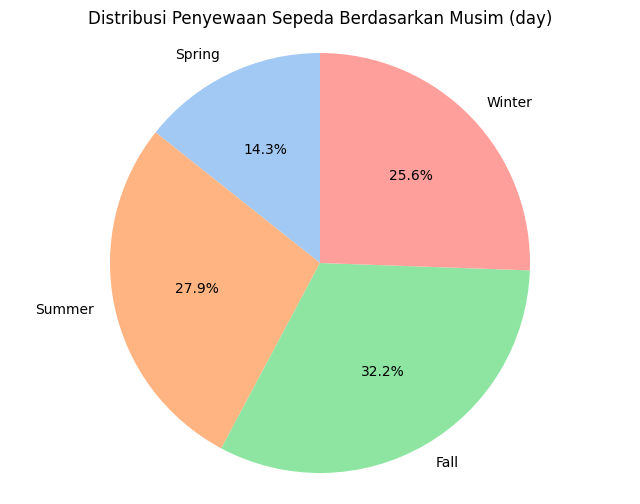

In [218]:

summary_df = day_df.groupby('season')['cnt'].sum().reset_index()

# label
summary_df['season_label'] = summary_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

colors_pallet = sns.color_palette("pastel")

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(summary_df['cnt'], labels=summary_df['season_label'], autopct='%1.1f%%', startangle=90, colors=colors_pallet)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (day)")
plt.axis('equal')  
plt.show()

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\1584821720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = hour_df.groupby('season')['cnt'].sum().reset_index()


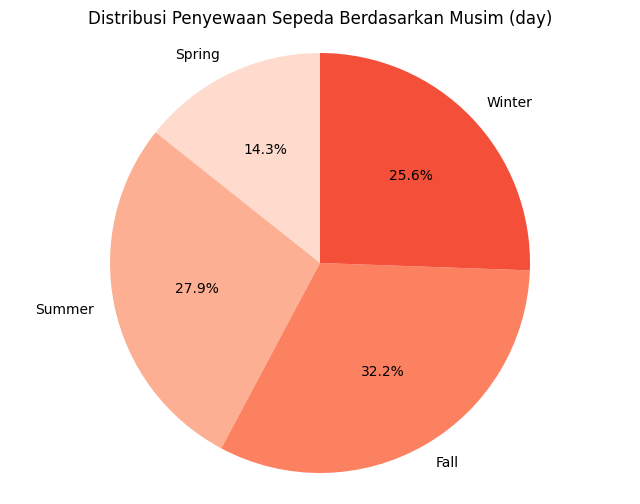

In [ ]:
summary_df = hour_df.groupby('season')['cnt'].sum().reset_index()

# label
summary_df['season_label'] = summary_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

colors_pallet = sns.color_palette("Reds")

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(summary_df['cnt'], labels=summary_df['season_label'], autopct='%1.1f%%', startangle=90, colors=colors_pallet)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (day)")
plt.axis('equal')  
plt.show()

### Pertanyaan 2:

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\3054199226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette="Blues")


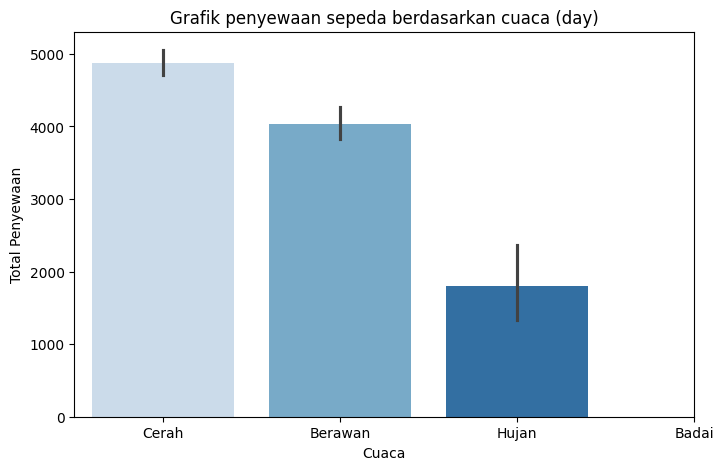

In [220]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette="Blues")
plt.xlabel("Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Grafik penyewaan sepeda berdasarkan cuaca (day)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Badai"])
plt.show()

- cuaca cerah memeliki jumlah penyewaan yang tinggi sebaliknya cuaca tidak memiliki jumlah penyewaan dalam rentan waktu hari

C:\Users\jayjo\AppData\Local\Temp\ipykernel_24036\285526730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="Greens")


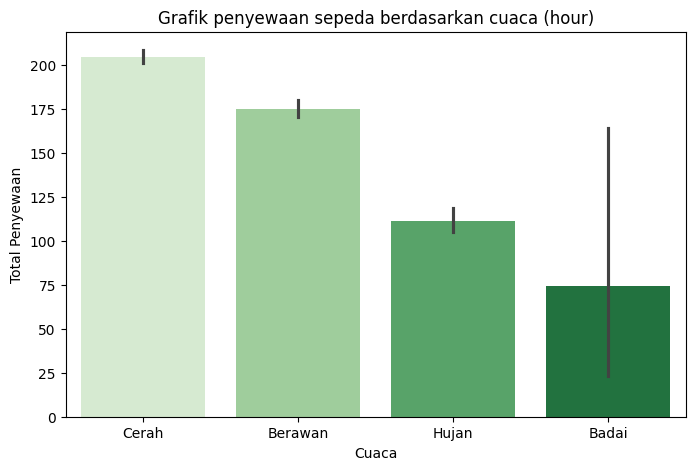

In [221]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="Greens")
plt.xlabel("Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Grafik penyewaan sepeda berdasarkan cuaca (hour)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Badai"])
plt.show()

- pada data ini cuaca badai masih terdapat pengguna yang menyewa sepeda dengan kurun waktu perjam

**Insight:**
- pada table pie chart terlihat bahwa data day dan hour memiliki outpu visualisasi yang sama karna pada hakikatnya membandingkan data yang sama pada cnt
- pada data bar chart yang membandingkan anatara cuaca dengan cnt diketahui bahwa pada data day tidak terdapat penyewaan pada saat cuaca badai sedangkan pada data hour terdapat

## Analisis Lanjutan (Opsional)

In [222]:
cnt_stats = day_df['cnt'].describe()

Deman = [cnt_stats['min'], cnt_stats['25%'], cnt_stats['75%'], cnt_stats['max']]
labels = ["Low", "Medium", "High"]
day_df['Level_deman'] = pd.cut(day_df['cnt'], bins=Deman, labels=labels)

rent_distribution = day_df['Level_deman'].value_counts()
print(rent_distribution)

Level_deman
Medium    365
High      183
Low       182
Name: count, dtype: int64


## Conclusion

- dari hasil analisis dapat dilihat musim cukup mempengaruhi jumlah penyewaan sepeda dengan gap data yang tidak terlalu jauh dapat dikatakan sepeda menjadi kebutuhan sehari hari tanpa terlalu taku memperhatikan musim 
- cuaca sendiri berpengaruh penting dimana dapat dilihat cuaca cerah memiliki intensitas penyewaan yang tinggi dimana dalam satu harinya bisa mencapai hampi 5000 penyewaan

## Data Merge

In [232]:
merged_df = pd.merge(day_df, hour_df, on=['dteday', 'season'], how='inner')
merged_df.to_csv("dashboard/main_data.csv", index=False)

# Menampilkan hasil join
print(merged_df)

          dteday season weathersit_x  cnt_x Level_deman  hr weathersit_y  \
0     2011-01-01      1            2    985         Low   0            1   
1     2011-01-01      1            2    985         Low   1            1   
2     2011-01-01      1            2    985         Low   2            1   
3     2011-01-01      1            2    985         Low   3            1   
4     2011-01-01      1            2    985         Low   4            1   
...          ...    ...          ...    ...         ...  ..          ...   
17374 2012-12-31      1            2   2729         Low  19            2   
17375 2012-12-31      1            2   2729         Low  20            2   
17376 2012-12-31      1            2   2729         Low  21            1   
17377 2012-12-31      1            2   2729         Low  22            1   
17378 2012-12-31      1            2   2729         Low  23            1   

       cnt_y  
0         16  
1         40  
2         32  
3         13  
4          1